# Qa)

## Code review

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
  degree=  15, score_mean=-180513241.14,  PolynomialFeatures(degree=15, include_bias=False)
OK


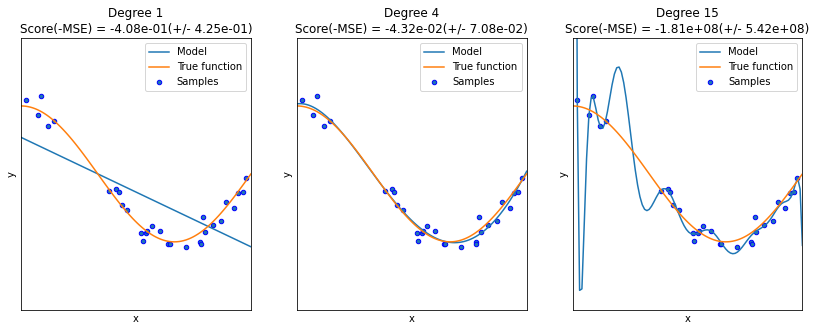

In [5]:
# TODO: code review
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]

print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])

    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))

plt.show()
print('OK')

# Qb)
https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76

# Qc)